## Locally Weighted Regression

1) Read and Noramlized the data

2) Generate W for every Query Point.

3) No training involve,directly prediction using (X.T W X)*(X.T w Y)

4) Finde the best value for Tau (Bandwidth Parameter)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd;

# Loading the data

In [152]:
X=np.zeros((99,99))
Y=np.zeros((99,99))
for i in range(99):
    temp=i;
    for j in range(99):
        X[i,j]=temp
        temp +=1
        Y[i,j]=i**2+j**2
        
        

In [153]:
plt.style.use("seaborn")
X=np.array(X)
Y=np.array(Y)

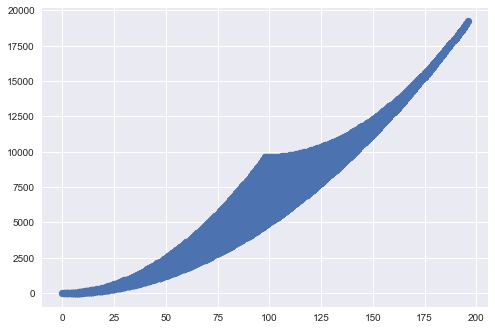

In [154]:
plt.scatter(X,Y)
plt.show()

In [155]:
print(X.std())
print(X.mean())

40.414518843273804
98.0


In [156]:
# Normalised the data
X=(X-X.mean())/X.std()

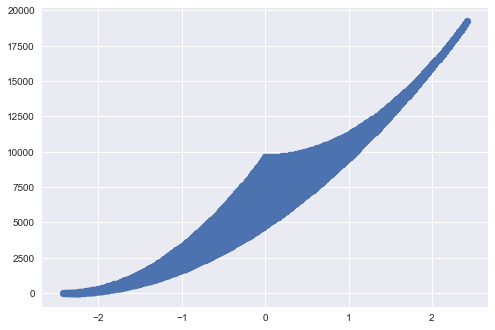

In [157]:
plt.scatter(X,Y)

In [158]:
print(X.mean(),X.std())   # so it is a normalised data

0.0 1.0


## Find out W (m X m) digonal matrix

In [159]:
W=np.mat(np.eye(X.shape[0]))  # numpy matrix
# The differece between numpy matrix and numpy array is a*b-->matrix-->matrix_mul and a*b -->numpy array --> elementwise multiplication

In [173]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    for i in range(M):
        xi=X[i];
        x=query_point
        W[i,i]=np.exp((np.dot((xi-x),(xi-x).T)/(-2*tau*tau)))
    return W;
    

In [178]:
X=np.mat(X)
Y=np.mat(Y)
m=X.shape[0]
W=getW(-1,X,1000) #if we change the value of tau then it is closed to identity .
print(W.shape)
print(W) # So we can see that the point which is closer is max and which is faraway is less 

(99, 99)
[[0.99997302 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99997351 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997394 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.9997437  0.         0.        ]
 [0.         0.         0.         ... 0.         0.99973838 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99973299]]


In [179]:
# if tau is large ,it mean that bandwidth is high and the locally point is more or vice versa


## Make Predictions

In [184]:
def predict(X,Y,query_X,tau):# there should one more feature
    m=X.shape[0]
    ones=np.ones((m,1))
    X_=np.hstack((X,ones)) 
    qx=(query_X)
    W=getW(qx,X_,tau)
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=qx*theta
   # print(theta.shape)
    return theta,pred        

In [185]:
theta,pred=predict(X,Y,1,1000)

In [186]:
theta

matrix([[ -37.2444199 ,  -37.26842852,  -37.3404544 , ..., -258.50790841,
         -263.14157305, -267.82325493],
        [ -35.66786144,  -35.6913801 ,  -35.76193605, ..., -252.41576855,
         -256.95486861, -261.54100596],
        [ -34.09130298,  -34.11433167,  -34.18341771, ..., -246.3236287 ,
         -250.76816417, -255.258757  ],
        ...,
        [ 115.68175048,  115.70526913,  115.77582509, ...,  332.42965759,
          336.96875764,  341.554895  ],
        [ 117.25830893,  117.28231756,  117.35434343, ...,  338.52179744,
          343.15546208,  347.83714397],
        [  63.71585149,   63.73565347,   63.79505941, ...,  246.21090099,
          250.03268317,  253.89406931]])

In [187]:
pred

matrix([[ -37.2444199 ,  -37.26842852,  -37.3404544 , ..., -258.50790841,
         -263.14157305, -267.82325493],
        [ -35.66786144,  -35.6913801 ,  -35.76193605, ..., -252.41576855,
         -256.95486861, -261.54100596],
        [ -34.09130298,  -34.11433167,  -34.18341771, ..., -246.3236287 ,
         -250.76816417, -255.258757  ],
        ...,
        [ 115.68175048,  115.70526913,  115.77582509, ...,  332.42965759,
          336.96875764,  341.554895  ],
        [ 117.25830893,  117.28231756,  117.35434343, ...,  338.52179744,
          343.15546208,  347.83714397],
        [  63.71585149,   63.73565347,   63.79505941, ...,  246.21090099,
          250.03268317,  253.89406931]])

In [188]:
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    for xq in X_test:
        theta,pred=predict(X,Y,xq,tau)
        Y_test.append(pred)
        XO=np.array(X)
        YO=np.array(Y)
        plt.scatter(XO,YO)
        plt.scatter(X_test,Y_test,color="red")
        plt.show()

In [190]:
# So how the tau varry the prediction is performe for accurate ans